#### 1.  Considering the hour-marks dataset, design a linear regression model that can effectively predict marks for a given hours of studying.

In [61]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [62]:
marks = pd.read_csv("marks.csv")
marks.head()

,Hours Spent Studying,SAT Score
0,4,390
1,9,580
2,10,650
3,14,730
4,4,410


In [158]:
class MarksLinearRegression:
    def __init__(self, marks):
        self.X = marks['Hours Spent Studying']
        self.Y = marks['SAT Score']
        
        # splitting into train and test
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size = 0.2)
        
        # coefficients
        self.B1 = 0
        self.B0 = 0
    
    def fit(self):
        
        # finding mean
        x_bar = np.mean(self.X_train)
        y_bar = np.mean(self.Y_train)
        
        cov = 0
        var = 0
        
        # finding covariance
        for x, y in zip(self.X_train, self.Y_train):
            cov += (x - x_bar)*(y - y_bar)
        
        # finding variance of x
        for x in self.X_train:
            var += (x - x_bar)*(x - x_bar)
            
        self.B1 = cov/var
        self.B0 = y_bar - (self.B1*x_bar)
    
    def predict(self):
        predictions = []
        
        for x in self.X_test:
            predictions.append(self.B1*x + self.B0)
            
        return predictions
    
    def plot(self):
        predictions = self.predict()

        plt.plot(self.X_test, predictions)
        plt.scatter(self.X_test, self.Y_test, color = "green")
    
    def evaluate(self):
        sst = 0
        ssr = 0
        sse = 0
        
        y_bar = np.mean(self.Y_test)
        
        predictions = self.predict()
        
        for y in predictions:
            ssr += (y - y_bar)*(y - y_bar)
        
        i = 0
        for y in self.Y_test:
            sse += (y - predictions[i])*(y - predictions[i])
            i += 1
            
        for y in self.Y_test:
            sst += (y - y_bar)*(y - y_bar)
            
        print("SST: ", sst)
        print("SSR+SSE: ", ssr+sse)
        
        r2 = ssr/(ssr + sse)
        return r2

SST:  63300.0
SSR+SSE:  38551.59617032998

Value of R^2:  0.8609604694104762


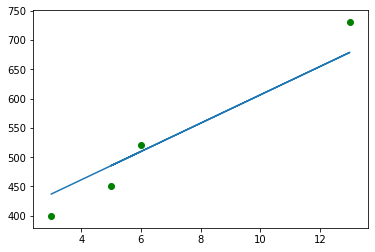

In [159]:
marksModel = MarksLinearRegression(marks)
marksModel.fit()
marksModel.plot()

print("\nValue of R^2: ", marksModel.evaluate())

#### 2. Considering the Boston Housing dataset, design a linear regression model considering each feature with non zero values, and report the best feature and model according to the R2metric.

In [54]:
housing = pd.read_csv("BostonHousing.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [160]:
class HousingLinearRegression:
    def __init__(self, data, feature):
        self.X = data[feature]
        self.Y = data['PRICE']
        
        # splitting into train and test
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size = 0.2)
        
        # coefficients
        self.B1 = 0
        self.B0 = 0
        
        # current feature
        self.feature = feature
    
    def fit(self):
        
        # finding mean
        x_bar = np.mean(self.X_train)
        y_bar = np.mean(self.Y_train)
        
        cov = 0
        var = 0
        
        # finding covariance
        for x, y in zip(self.X_train, self.Y_train):
            cov += (x - x_bar)*(y - y_bar)
        
        # finding variance of x
        for x in self.X_train:
            var += (x - x_bar)*(x - x_bar)
            
        self.B1 = cov/var
        self.B0 = y_bar - (self.B1*x_bar)
    
    def predict(self):
        predictions = []
        
        for x in self.X_test:
            predictions.append(self.B1*x + self.B0)
            
        return predictions
    
    def plot(self):
        predictions = self.predict()

        plt.plot(self.X_test, predictions)
        plt.scatter(self.X_test, self.Y_test, color = "green")
        plt.xlabel(self.feature)
        plt.ylabel('PRICE')
        plt.show()
    
    def evaluate(self):
        sst = 0
        ssr = 0
        sse = 0
        
        y_bar = np.mean(self.Y_test)
        
        predictions = self.predict()
        
        for y in predictions:
            ssr += (y - y_bar)*(y - y_bar)
        
        i = 0
        for y in self.Y_test:
            sse += (y - predictions[i])*(y - predictions[i])
            i += 1
            
        for y in self.Y_test:
            sst += (y - y_bar)*(y - y_bar)
            
        print("SST: ", sst)
        print("SSR+SSE: ", ssr+sse)
        
        r2 = ssr/(ssr + sse)
        
        return r2

In [161]:
len(housing)

506

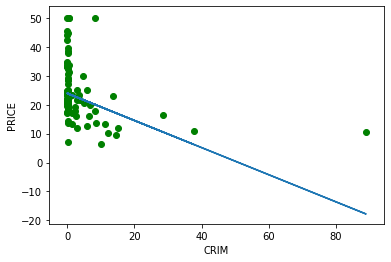

SST:  9163.349117647062
SSR+SSE:  11545.564057689873
Value of R^2 for feature CRIM  =  0.22070523428196145


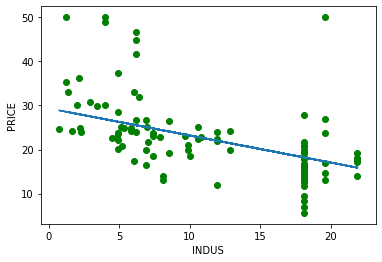

SST:  8560.679607843138
SSR+SSE:  7560.4818908523785
Value of R^2 for feature INDUS  =  0.2203366319979328


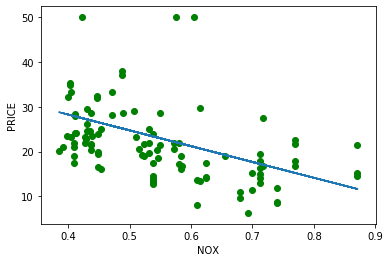

SST:  6954.372941176469
SSR+SSE:  7949.92293595939
Value of R^2 for feature NOX  =  0.27575752964281175


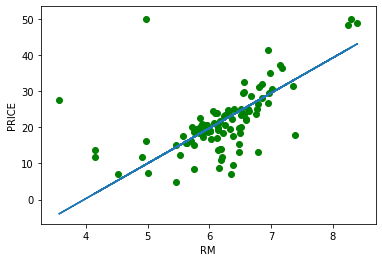

SST:  7822.282058823529
SSR+SSE:  10866.809022931144
Value of R^2 for feature RM  =  0.48548949243287154


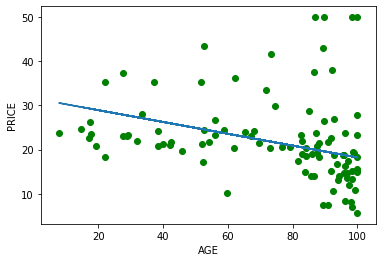

SST:  9199.882058823528
SSR+SSE:  10332.923869070699
Value of R^2 for feature AGE  =  0.1283480410908556


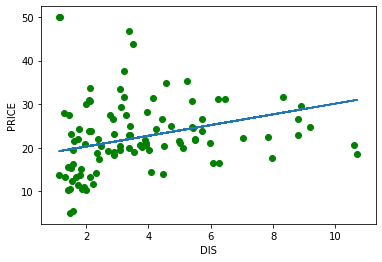

SST:  7128.254117647058
SSR+SSE:  7896.94991284551
Value of R^2 for feature DIS  =  0.09716356322710672


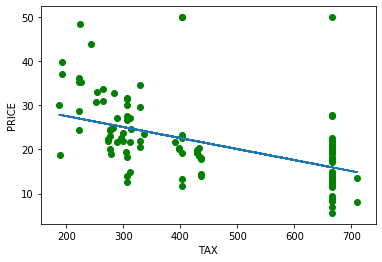

SST:  9059.07176470588
SSR+SSE:  8578.608716872372
Value of R^2 for feature TAX  =  0.24165828281476975


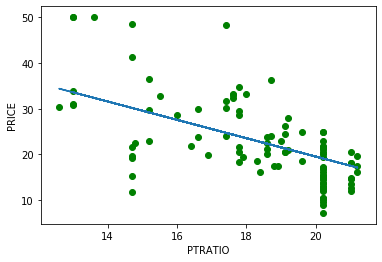

SST:  8971.294117647061
SSR+SSE:  7622.020882934175
Value of R^2 for feature PTRATIO  =  0.30489863332726264


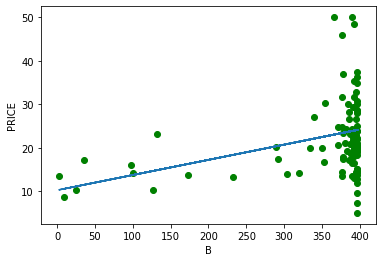

SST:  7436.610196078432
SSR+SSE:  7933.839636908357
Value of R^2 for feature B  =  0.1388788450193008


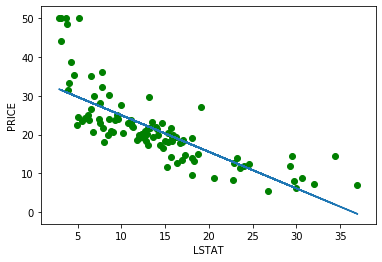

SST:  9198.82705882353
SSR+SSE:  8804.435675615394
Value of R^2 for feature LSTAT  =  0.576057334579403

Best feature:  LSTAT with R2 metric:  0.576057334579403


In [164]:
features = list()
# checking for non zero features
for col in housing.columns:
    if(len(housing[housing[col] != 0]) > 400):
        features.append(col)
        
features.remove('RAD')

# removing dependent attribute
features.remove('PRICE')

# finding best feature
feature = None
best_r2 = 0
for f in features:
    housingModel = HousingLinearRegression(housing, f)
    housingModel.fit()
    housingModel.plot()
    
    r2 = housingModel.evaluate()
    print("Value of R^2 for feature", f, " = ", r2)
    if r2 > best_r2:
        best_r2 = r2
        feature = f
        
print("\nBest feature: ", feature, "with R2 metric: ", best_r2)